# LDDS

# Tutorial 3: Variable time integration 

In this tutorial we will now set up the computation of LDs for a system that blows up in finite time, that is, trajectories when simulated will escape to infinity so fast that the numerically cannot be resolved after some finite simulation time.

The solution to this problem by LDDS is to use _Variable Time integration_ , which given a bounding box of the domain, will turn the vector field off (equal to zero), only for those trajectories escpaing beyond the `box_boundaries`. This is equivalent to stopping integration only for escaping trajectories, such that LD values stop being updated for them. 
 
To illustrate how to set up LDDS for LD calculations to deal with such situations, we study two systems: the _Hamilton-Saddle Node_ and the _Inverse Duffing oscillator_. Both 1DoF autonomous Hamiltonian system, for which trajectories can escape to infinity within the finite time-interval of simulation.

## Hamilton Saddle-Node

_Energy_

\begin{equation*}
H(x, p_x) = \frac{1}{2} p_x^2 + \frac{1}{2}x^2 + \frac{1}{3} x^3
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = - x - x^2
 \end{align*}

The setup is initialised as before

In [4]:
import os, sys
import numpy as np
sys.path.insert(1, os.pardir)

from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
from ldds.vector_fields import HamSN1D

In [5]:
# Integration parameters
tau = 8

# Lp-norm, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-1.5, 1]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [6]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = HamSN1D

__BUT__ now, we need a new variable called `box_boundaries`, defined as below

In [15]:
# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-6, 6] # defined only for configuration space - x axis
box_boundaries = [(box_x_min, box_x_max)]
# box_boundaries = False

which then, it's passed to `compute_lagrangian_descriptor` as an additional argument, to compute the forward and backward LDs for visualisation, as usual.

In [16]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

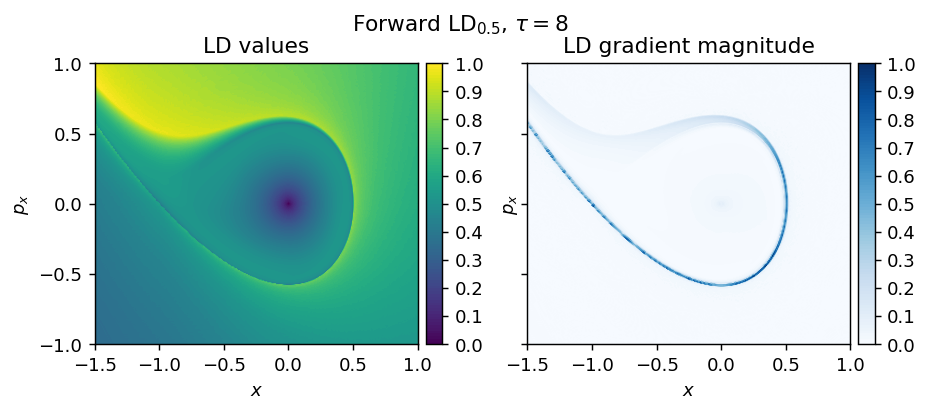

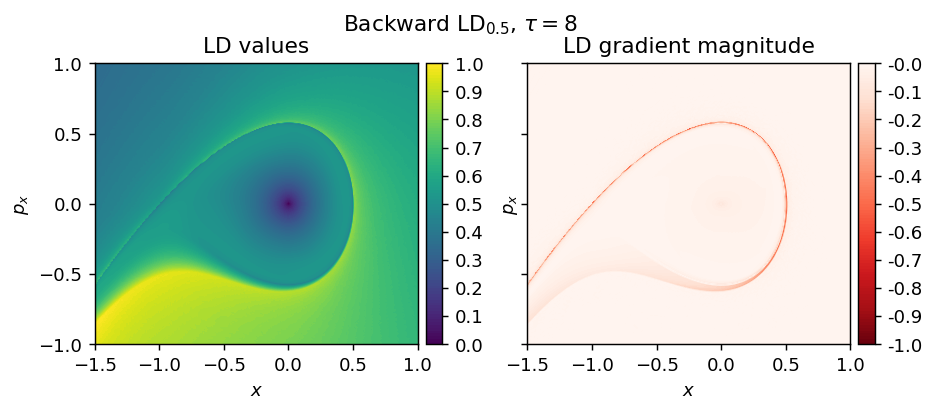

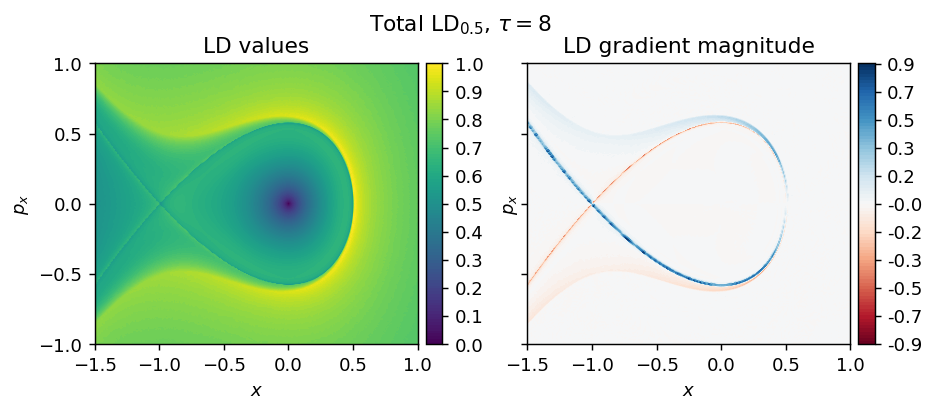

In [17]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

>__NOTE__ As an exercise, one can see that if `box_boundaries` are equal to `False`, which is set by default, the execution of `compute_lagrangian_descriptor` will throw an error message
>
``` python
ValueError: need at least one array to concatenate
```
> This is the result of the integrator breaking after failing to numerically integrate `vector_field`, resulting in an empty solution array.

## Inverted Duffing oscillator

In [7]:
from ldds.vector_fields import Duffing1D

_Energy_

\begin{equation*}
H(x, p_x) = \frac{1}{2} p_x^2 + \frac{1}{2} x^2 - \frac{1}{4} x^4
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = -x + x^3
 \end{align*}

In [8]:
# Integration parameters
tau = 10

# Lp-norm, p-value
p_norm = 1/2

# Mesh parameters
x_min,x_max = [-1.5, 1.5]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-6, 6]

In [9]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

# define inverted oscillator from redefining parameters of Duffing
alpha, beta = [-1, -1] 
vector_field = lambda t,u: Duffing1D(t, u, PARAMETERS = [alpha, beta])

box_boundaries = [(box_x_min, box_x_max)]

In [10]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

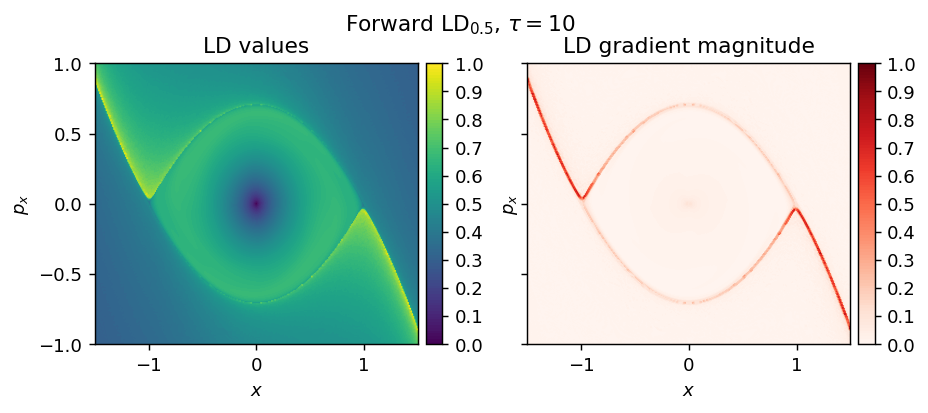

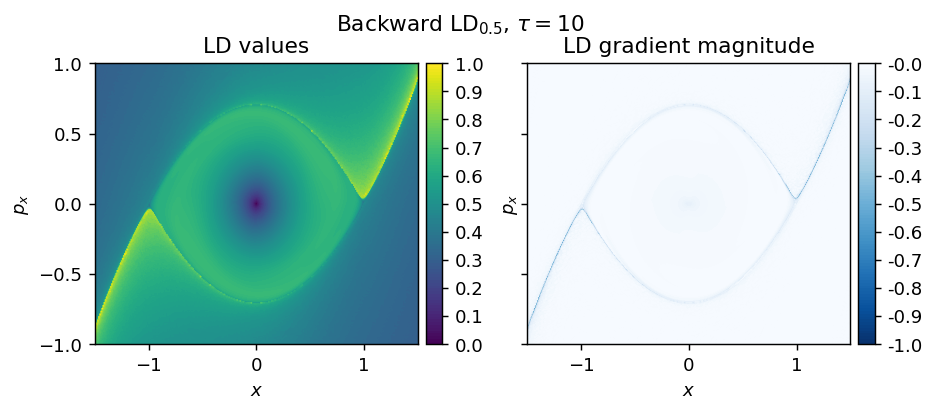

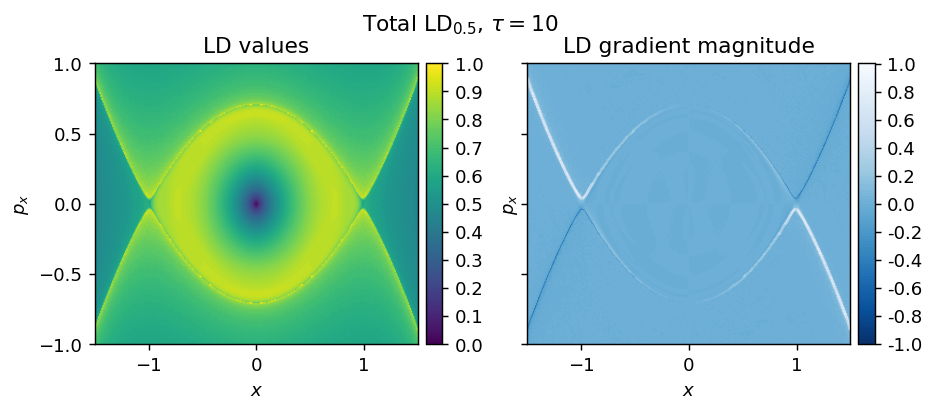

In [11]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)